# Plotting the ratio of subjets over total jets for different jet types

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_pt_av


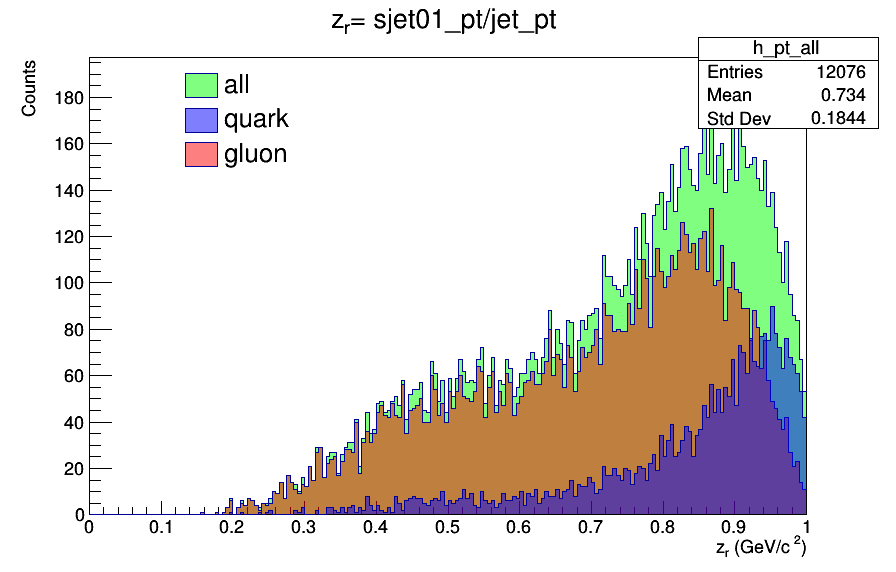

In [6]:
import os,sys
from ROOT import TH1F, TH2D, TFile, TCanvas, TFile, gROOT, TLegend

# open the input TTree
treeInput = TFile.Open("/Users/nacer/lbl/pyjetty/pyjetty/sandbox/leadsj_vs_x_bias80.root")
# t=TTree.Get("tlsjvsx")
t = treeInput.tlsjvsx

# plot the average Pt for q and g
c_pt_av = TCanvas("c_pt_av", "c_pt_av", 900, 600)
c_pt_av.cd()

h_pt_quark = TH1F("h_pt_quark", "z_{r}= sjet01_pt/jet_pt;z_{r} (GeV/c^{2});Counts", 200, 0, 1)
t.Project("h_pt_quark","sjet01_pt./j_pt.","pquark==1")
h_pt_quark.SetFillColorAlpha(4, 0.5)

h_pt_glue = TH1F("h_pt_glue", "z_{r}= sjet01_pt/jet_pt;z_{r} (GeV/c^{2});Counts", 200, 0, 1)
t.Project("h_pt_glue","sjet01_pt./j_pt.","pglue==1")
h_pt_glue.SetFillColorAlpha(2, 0.5)

h_pt_all = TH1F("h_pt_all", "z_{r}= sjet01_pt/jet_pt;z_{r} (GeV/c^{2});Counts", 200, 0, 1)
t.Project("h_pt_all","sjet01_pt./j_pt.","")
h_pt_all.SetFillColorAlpha(3, 0.5)

h_pt_all.Draw("hist")
h_pt_glue.Draw("hist same")
h_pt_quark.Draw("hist same")

l_pt = TLegend(0.2, 0.7, 0.4, 0.88);
l_pt.SetTextSize(0.05);
l_pt.SetBorderSize(0);
l_pt.AddEntry(h_pt_all, "all", "f");
l_pt.AddEntry(h_pt_quark, "quark", "f");
l_pt.AddEntry(h_pt_glue, "gluon", "f");
l_pt.Draw();
c_pt_av.Draw()

# Normalize the subjet ratios to the total jets

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_pt_av_norm


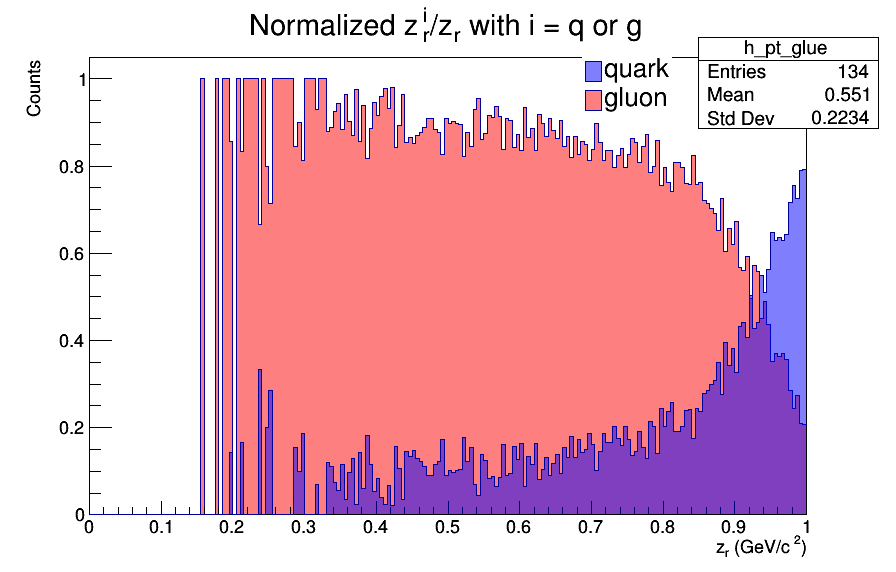

In [8]:
# normalized subjet ratios for each jet type to the total subjets
c_pt_av_norm = TCanvas("c_pt_av_norm", "c_pt_av_norm", 900, 600)
c_pt_av_norm.cd()

h_pt_quark_norm = h_pt_quark / h_pt_all
h_pt_glue_norm = h_pt_glue / h_pt_all

h_pt_quark_norm.SetFillColorAlpha(4, 0.5)
h_pt_glue_norm.SetFillColorAlpha(2, 0.5)

h_pt_glue_norm.Draw("hist ")
h_pt_quark_norm.Draw("hist same")

l_pt_norm = TLegend(0.65, 0.8, 0.75, 0.9);
l_pt_norm.SetTextSize(0.05);
l_pt_norm.SetBorderSize(0);
l_pt_norm.AddEntry(h_pt_quark_norm, "quark", "f");
l_pt_norm.AddEntry(h_pt_glue_norm, "gluon", "f");
l_pt_norm.Draw();

h_pt_glue_norm.SetTitle("Normalized z^{i}_{r}/z_{r} with i = q or g")
c_pt_av_norm.Draw()

# Study the correlation of the subjet ratio to the jet tranverse momentum $P_{t}$

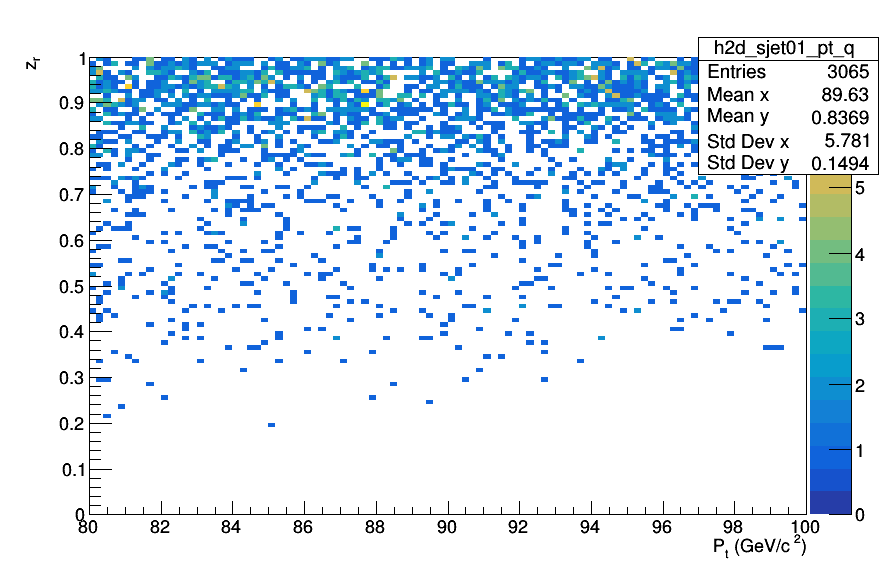

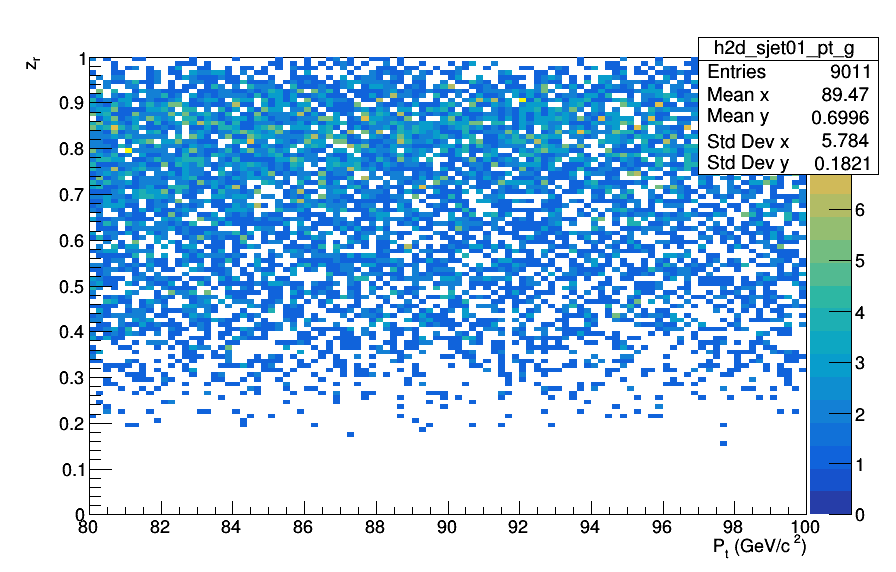

In [9]:
# scatter plot of subjet ratios vs. total jet_Pt
# quark
c_sjet01_pt_q = TCanvas("c_sjet01_pt_q", "c_sjet01_pt_q", 900, 600)
c_sjet01_pt_q.cd()
h2d_sjet01_pt_q = TH2D("h2d_sjet01_pt_q",";P_{t} (GeV/c^{2});z_{r}",100,80,100,100,0,1)
t.Project("h2d_sjet01_pt_q","sjet01_pt/j_pt:j_pt","pquark==1")
h2d_sjet01_pt_q.Draw("colz")
c_sjet01_pt_q.Draw()

# gluon
c_sjet01_pt_g = TCanvas("c_sjet01_pt_g", "c_sjet01_pt_g", 900, 600)
c_sjet01_pt_g.cd()
h2d_sjet01_pt_g = TH2D("h2d_sjet01_pt_g",";P_{t} (GeV/c^{2});z_{r}",100,80,100,100,0,1)
t.Project("h2d_sjet01_pt_g","sjet01_pt/j_pt:j_pt","pglue==1")
h2d_sjet01_pt_g.Draw("colz")
c_sjet01_pt_g.Draw()